In [6]:
import pandas as pd
import numpy as np
import keras
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import sklearn.metrics as metrics
from keras.callbacks import LearningRateScheduler
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)

In [7]:
import os
import shutil

# Define the source directories for the healthy and pneumonia images
healthy_dirs = [
    r'C:/Users/tulsi/Desktop/Pneumonia-Detection-using-Deep-Learning/chest_xray/chest_xray/test/NORMAL',
    r'C:/Users/tulsi/Desktop/Pneumonia-Detection-using-Deep-Learning/chest_xray/chest_xray/train/NORMAL',
    r'C:/Users/tulsi/Desktop/Pneumonia-Detection-using-Deep-Learning/chest_xray/chest_xray/val/NORMAL',
]

pneumonia_dirs = [
    r'C:/Users/tulsi/Desktop/Pneumonia-Detection-using-Deep-Learning/chest_xray/chest_xray/test/PNEUMONIA',
    r'C:/Users/tulsi/Desktop/Pneumonia-Detection-using-Deep-Learning/chest_xray/chest_xray/train/PNEUMONIA',
    r'C:/Users/tulsi/Desktop/Pneumonia-Detection-using-Deep-Learning/chest_xray/chest_xray/val/PNEUMONIA',
]

# Define the new directory to store the organized images
new_base_dir = r'C:/Users/tulsi/Desktop/Pneumonia-Detection-using-Deep-Learning/organized_dataset'

# Create the base directory if it doesn't exist
if not os.path.exists(new_base_dir):
    os.makedirs(new_base_dir)

# Create 'normal' and 'pneumonia' subfolders
normal_dir = os.path.join(new_base_dir, 'normal')
pneumonia_dir = os.path.join(new_base_dir, 'pneumonia')

os.makedirs(normal_dir, exist_ok=True)
os.makedirs(pneumonia_dir, exist_ok=True)

# Function to copy images from source directories to destination
def copy_images(src_dirs, dest_dir):
    for dir_path in src_dirs:
        for filename in os.listdir(dir_path):
            file_path = os.path.join(dir_path, filename)
            if os.path.isfile(file_path):
                shutil.copy(file_path, dest_dir)

# Copy images from healthy (normal) and pneumonia directories
copy_images(healthy_dirs, normal_dir)
copy_images(pneumonia_dirs, pneumonia_dir)

print("Images have been successfully copied to the new directory.")


Images have been successfully copied to the new directory.



Displaying Normal images info:
Image 1 - Size: (1317, 1857, 3) (Height x Width x Channels)
Image 2 - Size: (1509, 2111, 3) (Height x Width x Channels)
Image 3 - Size: (1837, 2031, 3) (Height x Width x Channels)


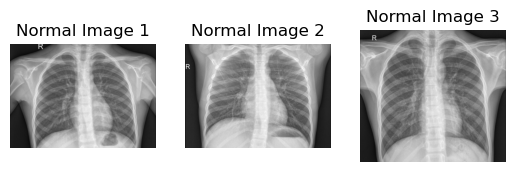


Displaying Pneumonia images info:
Image 1 - Size: (760, 1152, 3) (Height x Width x Channels)
Image 2 - Size: (768, 1072, 3) (Height x Width x Channels)
Image 3 - Size: (863, 1244, 3) (Height x Width x Channels)


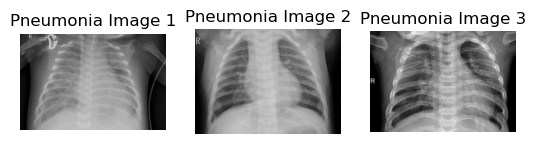

In [8]:
normal_images = [os.path.join(normal_dir, img) for img in os.listdir(normal_dir)]
pneumonia_images = [os.path.join(pneumonia_dir, img) for img in os.listdir(pneumonia_dir)]

# Display a few images from each class and print their size and channels
def display_image_info(images, class_name):
    print(f"\nDisplaying {class_name} images info:")
    for i, image_path in enumerate(images[:3]):  # Display the first 3 images
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
        plt.subplot(1, 3, i+1)
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.title(f'{class_name} Image {i+1}')
        # Image details
        print(f"Image {i+1} - Size: {img.shape} (Height x Width x Channels)")
    
    plt.show()

# Display images and their details
display_image_info(normal_images, 'Normal')
display_image_info(pneumonia_images, 'Pneumonia')

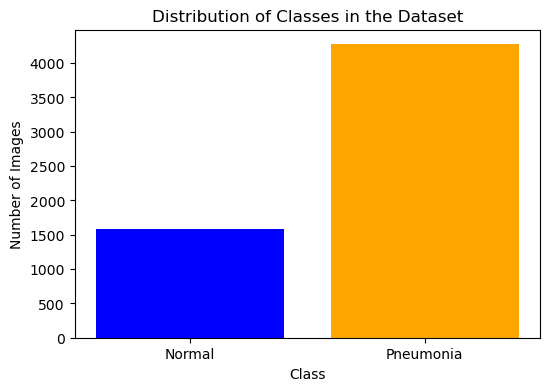


Class Distribution:
Normal: 1583 images
Pneumonia: 4273 images


In [9]:
# Plot the distribution of both classes
class_counts = {
    'Normal': len(normal_images),
    'Pneumonia': len(pneumonia_images),
}

# Plot the distribution
plt.figure(figsize=(6, 4))
plt.bar(class_counts.keys(), class_counts.values(), color=['blue', 'orange'])
plt.title("Distribution of Classes in the Dataset")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

# Optional: Print class distribution
print("\nClass Distribution:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")
